# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [18]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [54]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [64]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




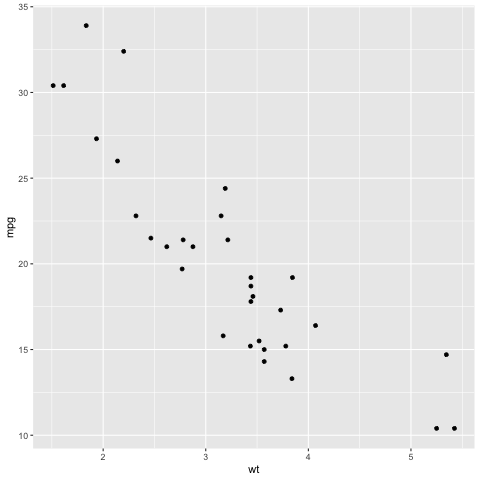

In [73]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    geom_point()

### 👉 Try It

1. Improve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    For the vehicles in this dataset, the heavier they get the less fuel efficient they tend to be.

    b. What can't we conclude about fuel efficiency and weight

    We can see that there is correlation, but we don't know exactly that a heavier vehicle determines less fuel efficiency. We cannot conclude that fuel efficiency or weight are variables indicative of a certain cost of vehicle.

    c. What further questions do you have about this data?

    For this chart, I am curious on the make and origin of the vehicles and if there is a correlation with weight decisions and fuel efficiency priorities?

    This chart does not tell us the fuel capacity. Does the heavier vehicle hold more gas but burns it faster?

### More scatterplots with `mpg` as the dependent variable

Let's see how different attributes of these cars correlate with fuel efficiency (miles per gallon)

Make a scatter plot for `mpg ~ disp` (that means `y=mpg` and `x=disp`)

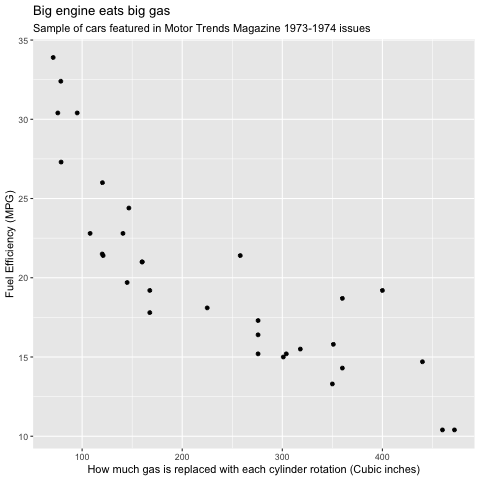

In [158]:
%%R 

# 👉 make the scatter plot
# 👉 carefully give it a title and subtitle

ggplot(mtcars) +
    aes(y=mpg, x=disp)+
    geom_point()+
    labs(title="Big engine eats big gas", subtitle="Sample of cars featured in Motor Trends Magazine 1973-1974 issues",x="How much gas is replaced with each cylinder rotation (Cubic inches)", y="Fuel Efficiency (MPG)")


`mpg ~ wt` 

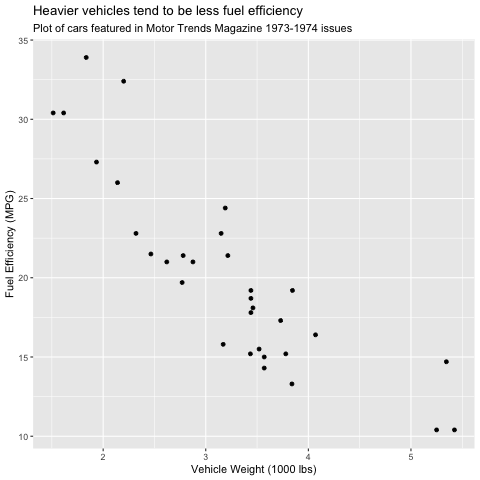

In [159]:
%%R 

# 👉 make the scatter plot
# 👉 carefully give it a title and subtitle

ggplot(mtcars) +
    aes(y=mpg, x=wt)+
    geom_point()+
    labs(title="Heavier vehicles tend to be less fuel efficiency", subtitle="Plot of cars featured in Motor Trends Magazine 1973-1974 issues",x="Vehicle Weight (1000 lbs)", y="Fuel Efficiency (MPG)")


 

`mpg ~ qsec` 

In [ ]:
%%R 

# 👉 make the scatter plot
# 👉 carefully give it a title and subtitle



NULL


`mpg ~ hp` 

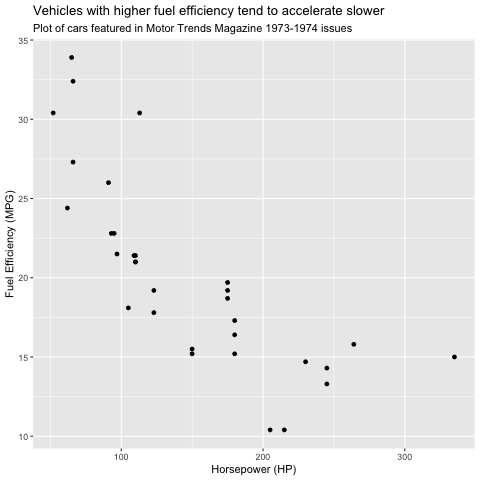

In [182]:
%%R 

# 👉 make the scatter plot
# 👉 carefully give it a title and subtitle

ggplot(mtcars)+
 aes(y=mpg, x=hp)+
    geom_point()+
    labs(title="Vehicles with higher fuel efficiency tend to accelerate slower", subtitle="Plot of cars featured in Motor Trends Magazine 1973-1974 issues",x="Horsepower (HP)", y="Fuel Efficiency (MPG)")


 

### Discrete Variables

In R, when working plotting discrete variables, use `factor()`, so for example, here is an example of the automatic vs manual cars



Here is the plot for `mpg ~ factor(am)`

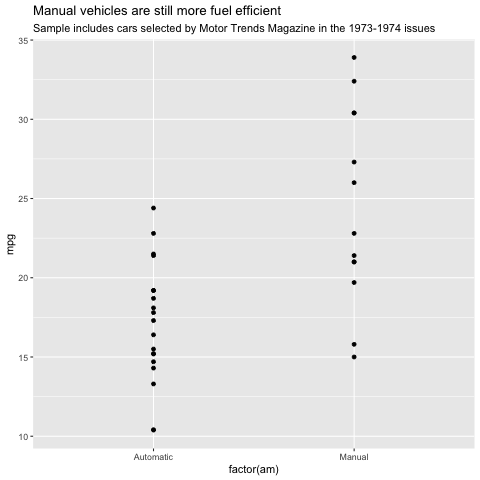

In [200]:
%%R 

# 👉 change the values of 0 and 1 in the dataframe to "automatic" and "manual"
# 👉 make a dot plot (as shown below) with the new data
# 👉 carefully give the plot a title and subtitle

mtcars <- mtcars |>
    mutate(am = str_replace_all(am, c("0" = "Automatic", "1" = "Manual")))

ggplot(mtcars) + 
    aes(x=factor(am), y=mpg) +
    geom_point()+
    labs(title="Manual vehicles are still more fuel efficient", subtitle="Sample includes cars selected by Motor Trends Magazine in the 1973-1974 issues")

### 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and whether a car is automatic or manual

    b. What can't we conclude about fuel efficiency and whether a car is automatic or manual

    c. What further questions do you have about this data?

👉 Make a plot for `mpg ~ factor(cyl)`

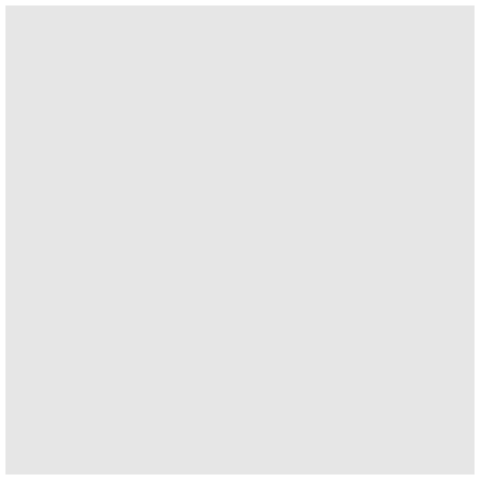

In [205]:
%%R 

ggplot(mtcars) 


👉 Make a plot for `mpg ~ factor(vs)`

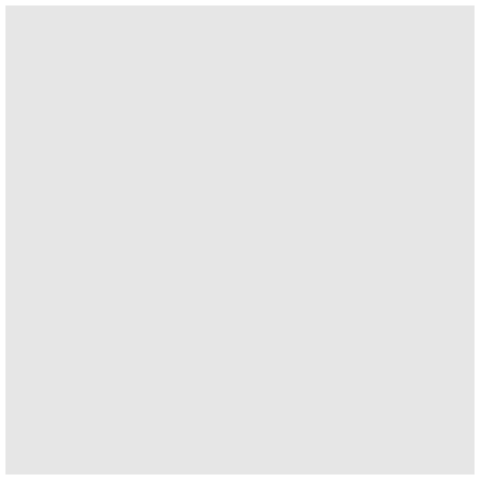

In [206]:
%%R 

ggplot(mtcars) 